In [1]:
import pandas
import numpy
import sklearn.feature_selection 
from pandas import read_csv
from pandas import set_option
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot


data = pandas.read_csv('./US_Accidents_March23.csv')
data2 = pandas.read_csv('./train_mobile.csv')
df = pandas.read_csv('./US_Accidents_March23.csv')

In [2]:
set_option('display.width', 100)
correlations = data.corr(method='pearson', numeric_only=True)
print(correlations)

                   Severity  Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  Temperature(F)  \
Severity           1.000000  -0.076981  -0.103261      NaN      NaN      0.034340        0.046538   
Start_Lat         -0.076981   1.000000   0.861073      NaN      NaN      0.103625       -0.567659   
Start_Lng         -0.103261   0.861073   1.000000      NaN      NaN      0.120892       -0.748900   
End_Lat                 NaN        NaN        NaN      NaN      NaN           NaN             NaN   
End_Lng                 NaN        NaN        NaN      NaN      NaN           NaN             NaN   
Distance(mi)       0.034340   0.103625   0.120892      NaN      NaN      1.000000       -0.109664   
Temperature(F)     0.046538  -0.567659  -0.748900      NaN      NaN     -0.109664        1.000000   
Wind_Chill(F)     -0.227485  -0.193373  -0.181182      NaN      NaN     -0.017924        0.977217   
Humidity(%)       -0.051149   0.265370   0.468385      NaN      NaN      0.080519       -0.

In [3]:
# dalla matrice di correlazione vediamo che sono correlate:
#        Start_Lat e Start_Lng (0.86 ca)
#        Start_Lng e Temperature (-0.74 ca)
#        Wind_Chill e Temperature (0.97 ca)
#        Humidity e Temperature (-0.87 ca)

In [4]:
# metodi di scelta delle feature del dataset train_mobile con price range scelta come variabile da predirre (output)

In [5]:
# uso Univariate Selection, un test statistico per selezionare le feature che incidono 
# maggiormente sulla variabile in output

array2 = data2.values
X2 = array2[:,0:20]
Y2 = array2[:,20]

print(data2)

# estrazione features
test2 = SelectKBest(score_func=chi2, k=4)
fit2 = test2.fit(X2,Y2)

# riassunto punteggi
print(fit2.scores_)
features2 = fit2.transform(X2)

# riassunto features selezionate
print(features2[0:5,:])

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  mobile_wt  \
0               842     0          2.2         0   1       0           7    0.6        188   
1              1021     1          0.5         1   0       1          53    0.7        136   
2               563     1          0.5         1   2       1          41    0.9        145   
3               615     1          2.5         0   0       0          10    0.8        131   
4              1821     1          1.2         0  13       1          44    0.6        141   
...             ...   ...          ...       ...  ..     ...         ...    ...        ...   
1995            794     1          0.5         1   0       1           2    0.8        106   
1996           1965     1          2.6         1   0       0          39    0.2        187   
1997           1911     0          0.9         1   1       1          36    0.7        108   
1998           1512     0          0.9         0   4       1

In [6]:
# le features che incidono maggiormente sul price range sono in ordine: 
#        ram (9.31267519e+05)
#        px_height (1.73635695e+04)
#        px_width (9.81058675e+03)
#        battery_power (1.41298666e+04)
# la matrice sotto indica i valori in input delle features selezionate (abbiamo preso le prime 5 righe 
# per avere un output più leggibile)

In [7]:
# prova con il dataset sugli incidenti stradali

print(data)

          ID   Source  Severity           Start_Time             End_Time  Start_Lat   Start_Lng  \
0        A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00  39.865147  -84.058723   
1        A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59  39.928059  -82.831184   
2        A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27  39.063148  -84.032608   
3        A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34  39.747753  -84.205582   
4        A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07  39.627781  -84.188354   
...      ...      ...       ...                  ...                  ...        ...         ...   
2831  A-2832  Source2         2  2016-07-12 15:12:42  2016-07-12 16:27:42  38.474407 -121.419067   
2832  A-2833  Source2         2  2016-07-12 15:45:38  2016-07-12 17:00:38  38.495541 -121.511070   
2833  A-2834  Source2         3  2016-07-12 15:26:19  2016-07-12 16:41:19  38.588917 -121.415375   


In [8]:
# Rimozione feature ritenute poco utili
data = data.drop(['ID', 'Source', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'State', 'Zipcode', 'Country', 'Street', 'City', 'County', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Wind_Chill(F)', 'Humidity(%)', 'Wind_Direction'], axis=1)
print(data)

      Severity           Start_Time             End_Time  Temperature(F)  Pressure(in)  \
0            3  2016-02-08 05:46:00  2016-02-08 11:00:00            36.9         29.68   
1            2  2016-02-08 06:07:59  2016-02-08 06:37:59            37.9         29.65   
2            2  2016-02-08 06:49:27  2016-02-08 07:19:27            36.0         29.67   
3            3  2016-02-08 07:23:34  2016-02-08 07:53:34            35.1         29.64   
4            2  2016-02-08 07:39:07  2016-02-08 08:09:07            36.0         29.65   
...        ...                  ...                  ...             ...           ...   
2831         2  2016-07-12 15:12:42  2016-07-12 16:27:42            87.1         29.91   
2832         2  2016-07-12 15:45:38  2016-07-12 17:00:38            88.0         29.89   
2833         3  2016-07-12 15:26:19  2016-07-12 16:41:19            89.6         29.91   
2834         2  2016-07-12 15:50:04  2016-07-12 17:05:04            84.2         30.03   
2835      

In [9]:
data.Roundabout.value_counts()

False    2834
True        1
Name: Roundabout, dtype: int64

In [10]:
data.Station.value_counts()

False    2786
True       49
Name: Station, dtype: int64

In [11]:
data.Stop.value_counts()

False    2716
True      119
Name: Stop, dtype: int64

In [12]:
data.Traffic_Calming.value_counts()

False    2833
True        2
Name: Traffic_Calming, dtype: int64

In [13]:
data.Traffic_Signal.value_counts()

False    2463
True      372
Name: Traffic_Signal, dtype: int64

In [14]:
data.Turning_Loop.value_counts()

False    2835
Name: Turning_Loop, dtype: int64

In [15]:
data = data.drop(['Roundabout', 'Station', 'Traffic_Calming', 'Turning_Loop'], axis=1)
print(data)

      Severity           Start_Time             End_Time  Temperature(F)  Pressure(in)  \
0            3  2016-02-08 05:46:00  2016-02-08 11:00:00            36.9         29.68   
1            2  2016-02-08 06:07:59  2016-02-08 06:37:59            37.9         29.65   
2            2  2016-02-08 06:49:27  2016-02-08 07:19:27            36.0         29.67   
3            3  2016-02-08 07:23:34  2016-02-08 07:53:34            35.1         29.64   
4            2  2016-02-08 07:39:07  2016-02-08 08:09:07            36.0         29.65   
...        ...                  ...                  ...             ...           ...   
2831         2  2016-07-12 15:12:42  2016-07-12 16:27:42            87.1         29.91   
2832         2  2016-07-12 15:45:38  2016-07-12 17:00:38            88.0         29.89   
2833         3  2016-07-12 15:26:19  2016-07-12 16:41:19            89.6         29.91   
2834         2  2016-07-12 15:50:04  2016-07-12 17:05:04            84.2         30.03   
2835      

In [16]:
print(data.columns)

Index(['Severity', 'Start_Time', 'End_Time', 'Temperature(F)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Stop', 'Traffic_Signal', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')


In [17]:
data = data.drop(['Amenity', 'Bump', 'Give_Way', 'No_Exit', 'Railway'], axis=1)  #abbiamo fatto lo stesso controllo di prima per il numero di true/false
print(data)

      Severity           Start_Time             End_Time  Temperature(F)  Pressure(in)  \
0            3  2016-02-08 05:46:00  2016-02-08 11:00:00            36.9         29.68   
1            2  2016-02-08 06:07:59  2016-02-08 06:37:59            37.9         29.65   
2            2  2016-02-08 06:49:27  2016-02-08 07:19:27            36.0         29.67   
3            3  2016-02-08 07:23:34  2016-02-08 07:53:34            35.1         29.64   
4            2  2016-02-08 07:39:07  2016-02-08 08:09:07            36.0         29.65   
...        ...                  ...                  ...             ...           ...   
2831         2  2016-07-12 15:12:42  2016-07-12 16:27:42            87.1         29.91   
2832         2  2016-07-12 15:45:38  2016-07-12 17:00:38            88.0         29.89   
2833         3  2016-07-12 15:26:19  2016-07-12 16:41:19            89.6         29.91   
2834         2  2016-07-12 15:50:04  2016-07-12 17:05:04            84.2         30.03   
2835      

In [18]:
data['Precipitation(in)'].isnull().sum()

2648

In [19]:
data['Precipitation(in)'].value_counts()

0.00    107
0.01     27
0.02     17
0.05      6
0.08      5
0.16      4
0.10      4
0.04      3
0.09      3
0.03      2
0.07      2
0.06      2
0.11      2
0.19      2
0.18      1
0.22      1
Name: Precipitation(in), dtype: int64

In [20]:
data['Precipitation(in)'].mean()

0.021595744680851063

In [21]:
# La colonna della precipitazione contiene quasi tutti NaN, con un valore medio dei non NaN prossimo allo 0, quindi la droppiamo
data = data.drop(['Precipitation(in)'], axis=1)
print(data)

      Severity           Start_Time             End_Time  Temperature(F)  Pressure(in)  \
0            3  2016-02-08 05:46:00  2016-02-08 11:00:00            36.9         29.68   
1            2  2016-02-08 06:07:59  2016-02-08 06:37:59            37.9         29.65   
2            2  2016-02-08 06:49:27  2016-02-08 07:19:27            36.0         29.67   
3            3  2016-02-08 07:23:34  2016-02-08 07:53:34            35.1         29.64   
4            2  2016-02-08 07:39:07  2016-02-08 08:09:07            36.0         29.65   
...        ...                  ...                  ...             ...           ...   
2831         2  2016-07-12 15:12:42  2016-07-12 16:27:42            87.1         29.91   
2832         2  2016-07-12 15:45:38  2016-07-12 17:00:38            88.0         29.89   
2833         3  2016-07-12 15:26:19  2016-07-12 16:41:19            89.6         29.91   
2834         2  2016-07-12 15:50:04  2016-07-12 17:05:04            84.2         30.03   
2835      

In [22]:
data['Stop'].isnull().sum()

1

In [23]:
# La riga 2835 contiene quasi solo NaN, quindi la togliamo
data = data.drop(2835)
print(data)

      Severity           Start_Time             End_Time  Temperature(F)  Pressure(in)  \
0            3  2016-02-08 05:46:00  2016-02-08 11:00:00            36.9         29.68   
1            2  2016-02-08 06:07:59  2016-02-08 06:37:59            37.9         29.65   
2            2  2016-02-08 06:49:27  2016-02-08 07:19:27            36.0         29.67   
3            3  2016-02-08 07:23:34  2016-02-08 07:53:34            35.1         29.64   
4            2  2016-02-08 07:39:07  2016-02-08 08:09:07            36.0         29.65   
...        ...                  ...                  ...             ...           ...   
2830         3  2016-07-12 15:00:15  2016-07-12 16:15:15            89.1         29.91   
2831         2  2016-07-12 15:12:42  2016-07-12 16:27:42            87.1         29.91   
2832         2  2016-07-12 15:45:38  2016-07-12 17:00:38            88.0         29.89   
2833         3  2016-07-12 15:26:19  2016-07-12 16:41:19            89.6         29.91   
2834      

In [24]:
data['Temperature(F)'].fillna(data['Temperature(F)'].mean(), inplace=True)
data['Temperature(F)'].isnull().sum()

0

In [25]:
data['Pressure(in)'].fillna(data['Pressure(in)'].mean(), inplace=True)
data['Pressure(in)'].isnull().sum()

0

In [26]:
data['Visibility(mi)'].fillna(data['Visibility(mi)'].mean(), inplace=True)
data['Visibility(mi)'].isnull().sum()

0

In [27]:
data['Wind_Speed(mph)'].fillna(data['Wind_Speed(mph)'].mean(), inplace=True)
data['Wind_Speed(mph)'].isnull().sum()

0

In [28]:
data['Weather_Condition'].isnull().sum()

20

In [29]:
data['Weather_Condition'].value_counts()

Clear                     1776
Overcast                   316
Partly Cloudy              235
Mostly Cloudy              149
Scattered Clouds           109
Light Snow                 104
Light Rain                  44
Haze                        30
Rain                        28
Light Freezing Drizzle      10
Heavy Rain                   3
Snow                         2
Fog                          2
Light Drizzle                1
Shallow Fog                  1
Light Freezing Rain          1
Cloudy                       1
Drizzle                      1
Light Rain Showers           1
Mist                         1
Name: Weather_Condition, dtype: int64

In [30]:
# Per le righe con Weather_Condition=NaN, possiamo o rimuovere le intere righe, o assumere Clear come valore, essendo nettamente il più frequente
print(data.loc[data['Weather_Condition'].isnull()])

      Severity           Start_Time             End_Time  Temperature(F)  Pressure(in)  \
439          2  2016-03-01 17:23:06  2016-03-01 18:23:06       48.200000     29.510000   
601          3  2016-03-11 07:28:40  2016-03-11 07:58:40       64.490319     29.959202   
1478         3  2016-06-27 20:42:18  2016-06-27 22:12:18       95.000000     29.870000   
1685         2  2016-06-29 14:44:14  2016-06-29 15:29:14       91.400000     29.940000   
1957         2  2016-07-03 03:54:45  2016-07-03 04:40:40       64.490319     29.959202   
1968         2  2016-07-03 08:41:05  2016-07-03 09:26:05       64.490319     29.959202   
1973         2  2016-07-03 11:59:28  2016-07-03 12:44:28       64.490319     29.959202   
1978         2  2016-07-03 13:12:18  2016-07-03 13:57:18       64.490319     29.959202   
1989         2  2016-07-03 15:33:37  2016-07-03 17:03:37       64.490319     29.959202   
2137         2  2016-07-05 09:44:44  2016-07-05 10:14:44       64.490319     29.959202   
2145      

In [31]:
# Notiamo che molte righe in cui è NaN, corrispondono a righe in cui prima abbiamo sostituito alcuni NaN con valori medi,
# ha quindi senso togliere l'intera riga
data = data.dropna(subset=['Weather_Condition'])
print(data)

      Severity           Start_Time             End_Time  Temperature(F)  Pressure(in)  \
0            3  2016-02-08 05:46:00  2016-02-08 11:00:00            36.9         29.68   
1            2  2016-02-08 06:07:59  2016-02-08 06:37:59            37.9         29.65   
2            2  2016-02-08 06:49:27  2016-02-08 07:19:27            36.0         29.67   
3            3  2016-02-08 07:23:34  2016-02-08 07:53:34            35.1         29.64   
4            2  2016-02-08 07:39:07  2016-02-08 08:09:07            36.0         29.65   
...        ...                  ...                  ...             ...           ...   
2829         3  2016-07-12 14:43:08  2016-07-12 15:13:08            93.9         29.88   
2831         2  2016-07-12 15:12:42  2016-07-12 16:27:42            87.1         29.91   
2832         2  2016-07-12 15:45:38  2016-07-12 17:00:38            88.0         29.89   
2833         3  2016-07-12 15:26:19  2016-07-12 16:41:19            89.6         29.91   
2834      

In [32]:
# Rinumeriamo gli indici delle righe
data = data.reset_index(drop=True)
print(data)

      Severity           Start_Time             End_Time  Temperature(F)  Pressure(in)  \
0            3  2016-02-08 05:46:00  2016-02-08 11:00:00            36.9         29.68   
1            2  2016-02-08 06:07:59  2016-02-08 06:37:59            37.9         29.65   
2            2  2016-02-08 06:49:27  2016-02-08 07:19:27            36.0         29.67   
3            3  2016-02-08 07:23:34  2016-02-08 07:53:34            35.1         29.64   
4            2  2016-02-08 07:39:07  2016-02-08 08:09:07            36.0         29.65   
...        ...                  ...                  ...             ...           ...   
2810         3  2016-07-12 14:43:08  2016-07-12 15:13:08            93.9         29.88   
2811         2  2016-07-12 15:12:42  2016-07-12 16:27:42            87.1         29.91   
2812         2  2016-07-12 15:45:38  2016-07-12 17:00:38            88.0         29.89   
2813         3  2016-07-12 15:26:19  2016-07-12 16:41:19            89.6         29.91   
2814      

In [33]:
# Verifichiamo se ci sono ancora valori NaN da correggere
data.isna().any().any()

False

In [34]:
data['Start_Time'] = pandas.to_datetime(data['Start_Time'])
data['End_Time'] = pandas.to_datetime(data['End_Time'])
print(data)

      Severity          Start_Time            End_Time  Temperature(F)  Pressure(in)  \
0            3 2016-02-08 05:46:00 2016-02-08 11:00:00            36.9         29.68   
1            2 2016-02-08 06:07:59 2016-02-08 06:37:59            37.9         29.65   
2            2 2016-02-08 06:49:27 2016-02-08 07:19:27            36.0         29.67   
3            3 2016-02-08 07:23:34 2016-02-08 07:53:34            35.1         29.64   
4            2 2016-02-08 07:39:07 2016-02-08 08:09:07            36.0         29.65   
...        ...                 ...                 ...             ...           ...   
2810         3 2016-07-12 14:43:08 2016-07-12 15:13:08            93.9         29.88   
2811         2 2016-07-12 15:12:42 2016-07-12 16:27:42            87.1         29.91   
2812         2 2016-07-12 15:45:38 2016-07-12 17:00:38            88.0         29.89   
2813         3 2016-07-12 15:26:19 2016-07-12 16:41:19            89.6         29.91   
2814         2 2016-07-12 15:50:

In [35]:
data['Duration'] = data.End_Time - data.Start_Time 
data['Duration'] = data['Duration'].apply(lambda x:round(x.total_seconds() / 60) ) 
print(data)

      Severity          Start_Time            End_Time  Temperature(F)  Pressure(in)  \
0            3 2016-02-08 05:46:00 2016-02-08 11:00:00            36.9         29.68   
1            2 2016-02-08 06:07:59 2016-02-08 06:37:59            37.9         29.65   
2            2 2016-02-08 06:49:27 2016-02-08 07:19:27            36.0         29.67   
3            3 2016-02-08 07:23:34 2016-02-08 07:53:34            35.1         29.64   
4            2 2016-02-08 07:39:07 2016-02-08 08:09:07            36.0         29.65   
...        ...                 ...                 ...             ...           ...   
2810         3 2016-07-12 14:43:08 2016-07-12 15:13:08            93.9         29.88   
2811         2 2016-07-12 15:12:42 2016-07-12 16:27:42            87.1         29.91   
2812         2 2016-07-12 15:45:38 2016-07-12 17:00:38            88.0         29.89   
2813         3 2016-07-12 15:26:19 2016-07-12 16:41:19            89.6         29.91   
2814         2 2016-07-12 15:50:

In [36]:
# A questo punto la colonna End_Time è superflua
data = data.drop(['End_Time'], axis=1)
print(data)

      Severity          Start_Time  Temperature(F)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
0            3 2016-02-08 05:46:00            36.9         29.68            10.0         9.817681   
1            2 2016-02-08 06:07:59            37.9         29.65            10.0         9.817681   
2            2 2016-02-08 06:49:27            36.0         29.67            10.0         3.500000   
3            3 2016-02-08 07:23:34            35.1         29.64             9.0         4.600000   
4            2 2016-02-08 07:39:07            36.0         29.65             6.0         3.500000   
...        ...                 ...             ...           ...             ...              ...   
2810         3 2016-07-12 14:43:08            93.9         29.88            10.0        10.400000   
2811         2 2016-07-12 15:12:42            87.1         29.91            10.0         6.900000   
2812         2 2016-07-12 15:45:38            88.0         29.89            10.0         9.

In [37]:
data = data.replace([True, False], [1, 0])
data['Sunrise_Sunset'] = data['Sunrise_Sunset'].replace({'Day': 1, 'Night': 0})
data['Civil_Twilight'] = data['Civil_Twilight'].replace({'Day': 1, 'Night': 0})
data['Nautical_Twilight'] = data['Nautical_Twilight'].replace({'Day': 1, 'Night': 0})
data['Astronomical_Twilight'] = data['Astronomical_Twilight'].replace({'Day': 1, 'Night': 0})

In [38]:
data.loc[data['Weather_Condition']=='Clear', 'Weather_Condition'] = '0'
data.loc[(data['Weather_Condition']=='Overcast')|(data['Weather_Condition']=='Mostly Cloudy'), 'Weather_Condition'] = '1'
data.loc[(data['Weather_Condition']=='Partly Cloudy')|(data['Weather_Condition']=='Scattered Clouds')|(data['Weather_Condition']=='Cloudy'), 'Weather_Condition'] = '2'
data.loc[(data['Weather_Condition']=='Light Snow')|(data['Weather_Condition']=='Snow'), 'Weather_Condition'] = '3'
data.loc[(data['Weather_Condition']=='Light Freezing Rain')|(data['Weather_Condition']=='Light Rain')|(data['Weather_Condition']=='Rain')|(data['Weather_Condition']=='Light Drizzle')|(data['Weather_Condition']=='Light Rain Showers')|(data['Weather_Condition']=='Drizzle'), 'Weather_Condition'] = '4'
data.loc[data['Weather_Condition']=='Heavy Rain', 'Weather_Condition'] = '5'
data.loc[(data['Weather_Condition']=='Light Freezing Rain')|(data['Weather_Condition']=='Light Freezing Drizzle'), 'Weather_Condition'] = '6'
data.loc[(data['Weather_Condition']=='Haze')|(data['Weather_Condition']=='Fog')|(data['Weather_Condition']=='Shallow Fog'), 'Weather_Condition'] = '7'
data.loc[data['Weather_Condition']=='Mist', 'Weather_Condition'] = '1234567'

In [39]:
print(data)

      Severity          Start_Time  Temperature(F)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
0            3 2016-02-08 05:46:00            36.9         29.68            10.0         9.817681   
1            2 2016-02-08 06:07:59            37.9         29.65            10.0         9.817681   
2            2 2016-02-08 06:49:27            36.0         29.67            10.0         3.500000   
3            3 2016-02-08 07:23:34            35.1         29.64             9.0         4.600000   
4            2 2016-02-08 07:39:07            36.0         29.65             6.0         3.500000   
...        ...                 ...             ...           ...             ...              ...   
2810         3 2016-07-12 14:43:08            93.9         29.88            10.0        10.400000   
2811         2 2016-07-12 15:12:42            87.1         29.91            10.0         6.900000   
2812         2 2016-07-12 15:45:38            88.0         29.89            10.0         9.

In [40]:
data = data.drop(['Start_Time'], axis=1)

In [41]:
print(data)

      Severity  Temperature(F)  Pressure(in)  Visibility(mi)  Wind_Speed(mph) Weather_Condition  \
0            3            36.9         29.68            10.0         9.817681                 4   
1            2            37.9         29.65            10.0         9.817681                 4   
2            2            36.0         29.67            10.0         3.500000                 1   
3            3            35.1         29.64             9.0         4.600000                 1   
4            2            36.0         29.65             6.0         3.500000                 1   
...        ...             ...           ...             ...              ...               ...   
2810         3            93.9         29.88            10.0        10.400000                 0   
2811         2            87.1         29.91            10.0         6.900000                 0   
2812         2            88.0         29.89            10.0         9.200000                 0   
2813      

In [42]:
data['Severity4'] = 0
data.loc[data['Severity'] == 4, 'Severity4'] = 1
data = data.drop(['Severity'], axis = 1)
data.Severity4.value_counts()

0    2812
1       3
Name: Severity4, dtype: int64

In [50]:
data['Weather_Condition'] = data['Weather_Condition'].astype(int)

In [51]:
print(data['Weather_Condition'].dtype)

int32


In [52]:
set_option('display.width', 100)
correlations = data.corr(method='pearson', numeric_only=True)
print(correlations)

                       Temperature(F)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
Temperature(F)               1.000000     -0.225094        0.489206         0.020707   
Pressure(in)                -0.225094      1.000000        0.194281        -0.070998   
Visibility(mi)               0.489206      0.194281        1.000000         0.076972   
Wind_Speed(mph)              0.020707     -0.070998        0.076972         1.000000   
Weather_Condition           -0.012705      0.004890       -0.068999         0.000004   
Crossing                    -0.007102      0.014084        0.030681         0.021516   
Junction                     0.094129     -0.021612        0.079467         0.048950   
Stop                         0.063249     -0.001291        0.027717        -0.023588   
Traffic_Signal              -0.098383      0.016809       -0.051233         0.015766   
Sunrise_Sunset               0.254557      0.100508        0.070750         0.103384   
Civil_Twilight               0.2

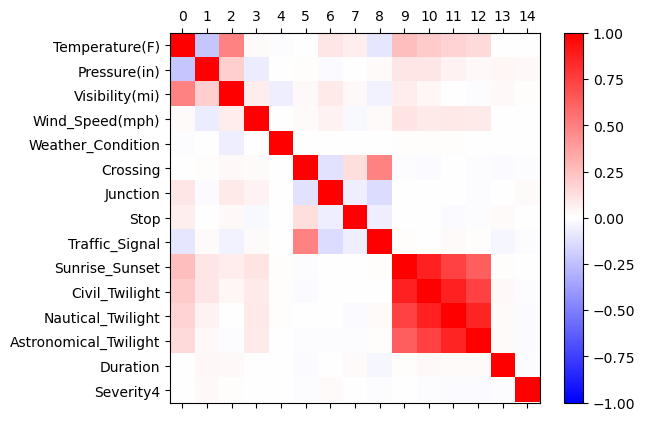

In [72]:
# plot matrice di correlazione
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1, cmap='bwr')
fig.colorbar(cax)
ticks = numpy.arange(0,15,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_yticklabels(data.columns)
pyplot.show()

#### RANDOM FOREST

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
array = data.values
X = array[:,1:14]
Y = array[:,0]
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lucal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lucal\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 385, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "C:\Users\lucal\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 746, in _validate_y_class_weight
    check_classification_targets(y)
  File "C:\Users\lucal\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 207, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'unknown'


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
array = data.values
X = array[:,1:14]
Y = array[:,0]
seed = 7
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

In [ ]:
"""
categorical_columns = data.select_dtypes(exclude='number').columns.tolist()
data = data.drop(columns = categorical_columns)
array = data.values

X = array[:,1:12]
Y = array[:,0]

print(data)
# estrazione features
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X,Y)

# riassunto punteggi
print(fit.scores_)
features = fit.transform(X)

# riassunto features selezionate
print(features[0:5,:])

"""

In [ ]:
#import sklearn.linear_model
#from sklearn.feature_selection import RFE
#from sklearn.linear_model import LogisticRegression
# load data


#array = data2.values
#X = array[:,0:20]
#Y = array[:,20]
# feature extraction
#model = LogisticRegression()
#rfe = RFE(model, 3)
#fit = rfe.fit(X, Y)
#print("Num Features: %d") % fit.n_features_
#print("Selected Features: %s") % fit.support_
#print("Feature Ranking: %s") % fit.ranking_

## PROVA CON UNISELECT

In [ ]:
print(df)

In [ ]:
df['Start_Time'] = pandas.to_datetime(df['Start_Time'])
df['End_Time'] = pandas.to_datetime(df['End_Time'])
df['Weather_Timestamp'] = pandas.to_datetime(df['Weather_Timestamp'])
df = df.drop(['ID', 'Source', 'Description', 'State', 'Country', 'Street', 'City', 'County', 'Timezone', 'Airport_Code', 'Zipcode', 'Weather_Timestamp'], axis=1)
print(df)
print(df.columns)

In [ ]:
df = df.drop(2835)
df = df.drop(['End_Lat', 'End_Lng'], axis=1)

In [ ]:
df['Temperature(F)'].fillna(df['Temperature(F)'].mean(), inplace=True)
df['Precipitation(in)'].fillna(df['Precipitation(in)'].mean(), inplace=True)
df['Pressure(in)'].fillna(df['Pressure(in)'].mean(), inplace=True)
df['Visibility(mi)'].fillna(df['Visibility(mi)'].mean(), inplace=True)
df['Wind_Speed(mph)'].fillna(df['Wind_Speed(mph)'].mean(), inplace=True)
df['Wind_Chill(F)'].fillna(df['Wind_Chill(F)'].mean(), inplace=True)
df['Humidity(%)'].fillna(df['Humidity(%)'].mean(), inplace=True)
df.isna().any().any()

In [ ]:
print(df)
print(df.columns)

In [ ]:
df = df.dropna(subset=['Wind_Direction'])
df = df.dropna(subset=['Weather_Condition'])

In [ ]:
df.isna().any().any()

In [ ]:
print(df)
print(df.columns)

In [ ]:
df = df.replace([True, False], [1, 0])
df['Sunrise_Sunset'] = df['Sunrise_Sunset'].replace({'Day': 1, 'Night': 0})
df['Civil_Twilight'] = df['Civil_Twilight'].replace({'Day': 1, 'Night': 0})
df['Nautical_Twilight'] = df['Nautical_Twilight'].replace({'Day': 1, 'Night': 0})
df['Astronomical_Twilight'] = df['Astronomical_Twilight'].replace({'Day': 1, 'Night': 0})
print(df)

In [ ]:
print(df['Wind_Direction'].value_counts())

In [ ]:
df.loc[df['Wind_Direction']=='Calm','Wind_Direction'] = '0'
df.loc[(df['Wind_Direction']=='South')|(df['Wind_Direction']=='SSW')|(df['Wind_Direction']=='SSE'),'Wind_Direction'] = '1'
df.loc[(df['Wind_Direction']=='SW'),'Wind_Direction'] = '12'
df.loc[(df['Wind_Direction']=='SE'),'Wind_Direction'] = '14'
df.loc[(df['Wind_Direction']=='West')|(df['Wind_Direction']=='W')|(df['Wind_Direction']=='WSW')|(df['Wind_Direction']=='WNW'),'Wind_Direction'] = '2'
df.loc[(df['Wind_Direction']=='North')|(df['Wind_Direction']=='NNW')|(df['Wind_Direction']=='NNE'),'Wind_Direction'] = '3'
df.loc[(df['Wind_Direction']=='NW'),'Wind_Direction'] = '32'
df.loc[(df['Wind_Direction']=='NE'),'Wind_Direction'] = '34'
df.loc[(df['Wind_Direction']=='East')|(df['Wind_Direction']=='ESE')|(df['Wind_Direction']=='ENE')|(df['Wind_Direction']=='E'),'Wind_Direction'] = '4'
df.loc[df['Wind_Direction']=='Variable','Wind_Direction'] = '1234'

In [ ]:
print(df['Weather_Condition'].value_counts())

In [ ]:
print(df)

In [ ]:
df.loc[df['Weather_Condition']=='Clear', 'Weather_Condition'] = '0'
df.loc[(df['Weather_Condition']=='Overcast')|(df['Weather_Condition']=='Mostly Cloudy'), 'Weather_Condition'] = '1'
df.loc[(df['Weather_Condition']=='Partly Cloudy')|(df['Weather_Condition']=='Scattered Clouds')|(df['Weather_Condition']=='Cloudy'), 'Weather_Condition'] = '2'
df.loc[(df['Weather_Condition']=='Light Snow')|(df['Weather_Condition']=='Snow'), 'Weather_Condition'] = '3'
df.loc[(df['Weather_Condition']=='Light Freezing Rain')|(df['Weather_Condition']=='Light Rain')|(df['Weather_Condition']=='Rain')|(df['Weather_Condition']=='Light Drizzle')|(df['Weather_Condition']=='Light Rain Showers')|(df['Weather_Condition']=='Drizzle'), 'Weather_Condition'] = '4'
df.loc[df['Weather_Condition']=='Heavy Rain', 'Weather_Condition'] = '5'
df.loc[(df['Weather_Condition']=='Light Freezing Rain')|(df['Weather_Condition']=='Light Freezing Drizzle'), 'Weather_Condition'] = '6'
df.loc[(df['Weather_Condition']=='Haze')|(df['Weather_Condition']=='Fog')|(df['Weather_Condition']=='Shallow Fog'), 'Weather_Condition'] = '7'
df.loc[df['Weather_Condition']=='Mist', 'Weather_Condition'] = '1234567'
print(df['Weather_Condition'].value_counts())

In [ ]:
print(df)

In [ ]:
df = df.drop(['Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'Wind_Chill(F)'], axis=1)
print(df)

In [ ]:
print(df['Severity'].value_counts())

In [ ]:
print(df.columns)

In [ ]:
df['Severity4'] = 0
df.loc[(df['Severity'] == 4)|(df['Severity'] == 3), 'Severity4'] = 1
df = df.drop(['Severity'], axis = 1)
df.Severity4.value_counts()
print(df.columns)

In [ ]:
print(df)

In [ ]:
#(df['Wind_Chill(F)'] < 0).any()

In [ ]:
df['Severity4'].astype(int)

In [ ]:
print(df.columns)

In [ ]:
array = df.values

X = array[:,0:25]
#Y = array[:,26]
Y = df['Severity4']

# estrazione features
test = SelectKBest(score_func=chi2, k=10)
fit = test.fit(X,Y)

# riassunto punteggi
print(fit.scores_)
features = fit.transform(X)

# riassunto features selezionate
print(features[0:5,:])